In [1]:
# modules importation
from trends_functions import *
import pickle
import os

In [2]:
# import seaborn style
sns.set()
sns.set_context("paper")
# sns.set_style("whitegrid")
sns.color_palette("muted")
# since each figure will be a subfigure, increase font_size
fscale = 1.2
sns.set(font_scale=fscale)

In [3]:
# computation parameters
params = get_params()

In [4]:
# run observations
# 'ang4487aer' 'od550aer' 'od550gt1aer' 'od550lt1aer' 'concpm10' 'concpm25' 'concso4' 'absc550aer'
var = 'od550aer'
params['kind'] = 'obs'
params = fill_params(params, var)
params['var'] = var
obs_source = params['source']
reader = pya.io.ReadUngridded(obs_source)
obs_data = reader.read(vars_to_retrieve=var)

In [5]:
print('OBS')
OBS_TS, OBS_MAP, OBS_DF = process_trend(
    obs_data, params,
    plot=False, show_plot=False, save_plot=False, write_json=False
)

OBS
no flags


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:988: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  df = df.resample('D', how='mean')


no flags
no flags ASIA station:  Zhongshan_UnivityDh ASIA station:  DRAGON_Tsukuba
no flags NAMERICA station:  Yumaowknife_AuroraC NAMERICA station:  Calipso_WofDenton NAMERICA station:  DRAGON_Pylesville
no flags SAMERICA station:  Veracruz_MAX_MEXFOPSAMERICA station:  Ji_Parana_SE
no flags NAFRICA station:  Zinder_DMNporttutea
region:  SAFRICA station:  Walvis_Bay_airport
Less than 7 points in selected period
no flags
no flags AUSTRALIA station:  Tinga_Tinganand_QLD


In [6]:
fn0 = 'cache/emi_species_cs.pkl'
if os.path.isfile(fn0):
    print('use',fn0)
    # for reading also binary mode is important 
    pklfile = open(fn0, 'rb')      
    MOD_MAP = pickle.load(pklfile) 
    pklfile.close()
else:    
    MOD_TS, MOD_MAP, MOD_DF = {}, {}, {}
    for mod_var in ['emidust', 'emiss', 'emiso4', 'emioa', 'emibc']:
        MOD_MAP[mod_var] = {}
        #fill paameters for this variable
        params = fill_params(params, mod_var)
        params['kind'] = 'mod' 
        params['min_dim'] = 0
        params['min_ntrend'] = 4

        for model in params['models']:
            mod_source = model

            #check if model in cache
            fn = 'cache/'+mod_source+'_'+mod_var+'.pkl'
            if os.path.isfile(fn):
                print(model,'use',fn)
                # for reading also binary mode is important 
                pklfile = open(fn, 'rb')      
                mod_data = pickle.load(pklfile) 
                pklfile.close()
            else:
                print(model,'read netcf file')
                reader = pya.io.ReadGridded(mod_source)
                mod_data = reader.read_var(mod_var, ts_type='daily')
                mod_data = mod_data.resample_time(to_ts_type='monthly')

                #write picke file in cache directory
                pklfile = open(fn, 'ab') 

                # source, destination 
                pickle.dump(mod_data, pklfile)                      
                pklfile.close()

            #crop the cube to interest period, so can handle WORLD region
            mod_data = mod_data.crop(time_range=(params['period'].split('-')[0], str(int(params['period'].split('-')[1])+1)))

            #space colocation
            _, MOD_MAP[mod_var][model], _ = process_trend(
                mod_data, params, obs=obs_data,
                colocate_time=False, colocate_space=True, 
                OBS_DF = OBS_DF,
                plot=False, show_plot=False, save_plot=False, write_json=False
            )
    
    #write picke file in cache directory
    pklfile = open(fn0, 'ab') 

    # source, destination 
    pickle.dump(MOD_MAP, pklfile)                      
    pklfile.close()

GEOS-i33p2_HIST use cache/GEOS-i33p2_HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:719: RuntimeWarning: invalid value encountered in double_scalars
  rel_slope = a * 100 / reg[0]
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:504: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = m_err / v0
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:505: RuntimeWarning: invalid value encountered in double_scalars
  delta_ref = m * v0_err / v0**2
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:727: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = slope_err/a


OsloCTM3v1.01-met2010_AP3-HIST use cache/OsloCTM3v1.01-met2010_AP3-HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
CAM5-ATRAS_AP3-HIST use cache/CAM5-ATRAS_AP3-HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
GFDL-AM4-amip_HIST use cache/GFDL-AM4-amip_HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:719: RuntimeWarning: invalid value encountered in double_scalars
  rel_slope = a * 100 / reg[0]
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:504: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = m_err / v0
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:505: RuntimeWarning: invalid value encountered in double_scalars
  delta_ref = m * v0_err / v0**2
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:727: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = slope_err/a


/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan


ECHAM6.3-HAM2.3-fSST_HIST use cache/ECHAM6.3-HAM2.3-fSST_HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:719: RuntimeWarning: invalid value encountered in double_scalars
  rel_slope = a * 100 / reg[0]
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:504: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = m_err / v0
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:505: RuntimeWarning: invalid value encountered in double_scalars
  delta_ref = m * v0_err / v0**2
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:727: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = slope_err/a


BCC-CUACE_AP3-HIST use cache/BCC-CUACE_AP3-HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anacon

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:719: RuntimeWarning: invalid value encountered in double_scalars
  rel_slope = a * 100 / reg[0]
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:504: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = m_err / v0
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:505: RuntimeWarning: invalid value encountered in double_scalars
  delta_ref = m * v0_err / v0**2
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:727: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = slope_err/a


GEOS-i33p2_HIST use cache/GEOS-i33p2_HIST_emiss.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


OsloCTM3v1.01-met2010_AP3-HIST use cache/OsloCTM3v1.01-met2010_AP3-HIST_emiss.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
CAM5-ATRAS_AP3-HIST use cache/CAM5-ATRAS_AP3-HIST_emiss.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)



Less than 4 points in selected period
region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP MALE
Less than 4 points in selected period
GFDL-AM4-amip_HIST use cache/GFDL-AM4-amip_HIST_emiss.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


ECHAM6.3-HAM2.3-fSST_HIST use cache/ECHAM6.3-HAM2.3-fSST_HIST_emiss.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:719: RuntimeWarning: invalid value encountered in double_scalars
  rel_slope = a * 100 / reg[0]
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:504: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = m_err / v0
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:505: RuntimeWarning: invalid value encountered in double_scalars
  delta_ref = m * v0_err / v0**2
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:727: RuntimeWarning: invalid value encountered in double_scalars
  delta_sl = slope_err/a


BCC-CUACE_AP3-HIST use cache/BCC-CUACE_AP3-HIST_emiss.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anacon

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


GEOS-i33p2_HIST use cache/GEOS-i33p2_HIST_emiso4.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


OsloCTM3v1.01-met2010_AP3-HIST use cache/OsloCTM3v1.01-met2010_AP3-HIST_emiso4.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)



Less than 4 points in selected period
region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOPRLD station:  Easton-MDE
Less than 4 points in selected period
CAM5-ATRAS_AP3-HIST use cache/CAM5-ATRAS_AP3-HIST_emiso4.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
ECHAM6.3-HAM2.3-fSST_HIST read netcf file


/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan


GEOS-i33p2_HIST read netcf fileorodurg-CEFOP


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled

OsloCTM3v1.01-met2010_AP3-HIST read netcf fileP


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
CAM5-ATRAS_AP3-HIST read netcf file


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)



Less than 4 points in selected period
region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOPtation:  Belterra
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
GFDL-AM4-amip_HIST read netcf file


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emioa'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emioa'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emioa'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emioa'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/l

ECHAM6.3-HAM2.3-fSST_HIST read netcf fileFOPFOP


/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


In [7]:
for mod_var in ['emidust']:
    MOD_MAP[mod_var] = {}
    #fill paameters for this variable
    params = fill_params(params, mod_var)
    params['kind'] = 'mod' 
    params['min_dim'] = 0
    params['min_ntrend'] = 4

    for model in params['models']:
        mod_source = model

        #check if model in cache
        fn = 'cache/'+mod_source+'_'+mod_var+'.pkl'
        if os.path.isfile(fn):
            print(model,'use',fn)
            # for reading also binary mode is important 
            pklfile = open(fn, 'rb')      
            mod_data = pickle.load(pklfile) 
            pklfile.close()
        else:
            print(model,'read netcf file')
            reader = pya.io.ReadGridded(mod_source)
            mod_data = reader.read_var(mod_var, ts_type='daily')
            mod_data = mod_data.resample_time(to_ts_type='monthly')

            #write picke file in cache directory
            pklfile = open(fn, 'ab') 

            # source, destination 
            pickle.dump(mod_data, pklfile)                      
            pklfile.close()

        #crop the cube to interest period, so can handle WORLD region
        mod_data = mod_data.crop(time_range=(params['period'].split('-')[0], str(int(params['period'].split('-')[1])+1)))

        #space colocation
        _, MOD_MAP[mod_var][model], _ = process_trend(
            mod_data, params, obs=obs_data,
            colocate_time=False, colocate_space=True, 
            OBS_DF = OBS_DF,
            plot=False, show_plot=False, save_plot=False, write_json=False
        )

#write picke file in cache directory
pklfile = open(fn0, 'ab') 

# source, destination 
pickle.dump(MOD_MAP, pklfile)                      
pklfile.close()

GEOS-i33p2_HIST read netcf file


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'month of year'
  warnings.warn(msg)
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled

OsloCTM3v1.01-met2010_AP3-HIST read netcf fileP


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
CAM5-ATRAS_AP3-HIST read netcf file


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

region:  EUROPE station:  ZvenigorodhecergDWD
Less than 4 points in selected period


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


region:  ASIA station:  Yekaterinburgoo
Less than 4 points in selected period
region:  NAMERICA station:  Yumaesiuilleillelee
Less than 4 points in selected period
region:  SAMERICA station:  UdeConcepcion-CEFOP
Less than 4 points in selected period
region:  NAFRICA station:  SaadaSougouANMLI
Less than 4 points in selected period
region:  AUSTRALIA station:  Jabirurale
Less than 4 points in selected period
region:  WORLD station:  Zvenigorodurg-CEFOP
Less than 4 points in selected period
GFDL-AM4-amip_HIST read netcf file


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emibc'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emibc'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emibc'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'area', referenced by netCDF variable 'emibc'
  warnings.warn(message % (variable_name, nc_var_name))
/home/augustinm/anaconda3/envs/pya/l

/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan


ECHAM6.3-HAM2.3-fSST_HIST read netcf fileFOPFOP


/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


In [30]:
MOD_TS, MOD_MAP, MOD_DF = {}, {}, {}
for mod_var in ['emidust']:
    MOD_MAP[mod_var] = {}
    #fill paameters for this variable
    params = fill_params(params, mod_var)
    params['kind'] = 'mod' 
    params['min_dim'] = 0
    params['min_ntrend'] = 4

    for model in [params['models'][0]]:
        mod_source = model

        #check if model in cache
        fn = 'cache/'+mod_source+'_'+mod_var+'.pkl'
        if os.path.isfile(fn):
            print(model,'use',fn)
            # for reading also binary mode is important 
            pklfile = open(fn, 'rb')      
            mod_data = pickle.load(pklfile) 
            pklfile.close()
        else:
            print(model,'read netcf file')
            reader = pya.io.ReadGridded(mod_source)
            mod_data = reader.read_var(mod_var, ts_type='daily')
            mod_data = mod_data.resample_time(to_ts_type='monthly')

            #write picke file in cache directory
            pklfile = open(fn, 'ab') 

            # source, destination 
            pickle.dump(mod_data, pklfile)                      
            pklfile.close()

        #crop the cube to interest period, so can handle WORLD region
        mod_data = mod_data.crop(time_range=(params['period'].split('-')[0], str(int(params['period'].split('-')[1])+1)))
        
        #if emissions, apply factor
        emif = 1e9
        #if mod_var[0:3]=='emi':
        #    mod_data.data = mod_data.data * 1e9
        #space colocation
        _, MOD_MAP[mod_var][model], _ = process_trend(
            mod_data, params, obs=obs_data,
            colocate_time=False, colocate_space=False, 
            OBS_DF = OBS_DF,
            plot=False, show_plot=False, save_plot=False, write_json=False
        )

GEOS-i33p2_HIST use cache/GEOS-i33p2_HIST_emidust.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_S

In [32]:
MOD_MAP[mod_var][model]['WORLD']['trends']['trends']['2000-2014']

{'pval': 0.09264256691158146,
 'rel_slp': -0.20256117139539634,
 'abs_slp': -1.9575011848694618e-13,
 'reg0': 4.881377697934696e-10,
 'n': 15,
 'data': [9.66375328195772e-11,
  9.644178270109025e-11,
  9.62460325826033e-11,
  9.605028246411635e-11,
  9.58545323456294e-11,
  9.56587822271425e-11,
  9.546303210865554e-11,
  9.526728199016859e-11,
  9.507153187168164e-11,
  9.487578175319468e-11,
  9.468003163470773e-11,
  9.448428151622078e-11,
  9.428853139773388e-11,
  9.409278127924692e-11,
  9.389703116075997e-11],
 'jsdate': [959817600000,
  991353600000,
  1022889600000,
  1054425600000,
  1086048000000,
  1117584000000,
  1149120000000,
  1180656000000,
  1212278400000,
  1243814400000,
  1275350400000,
  1306886400000,
  1338508800000,
  1370044800000,
  1401580800000],
 'err_rel_slp': 0.3315049846005725}

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


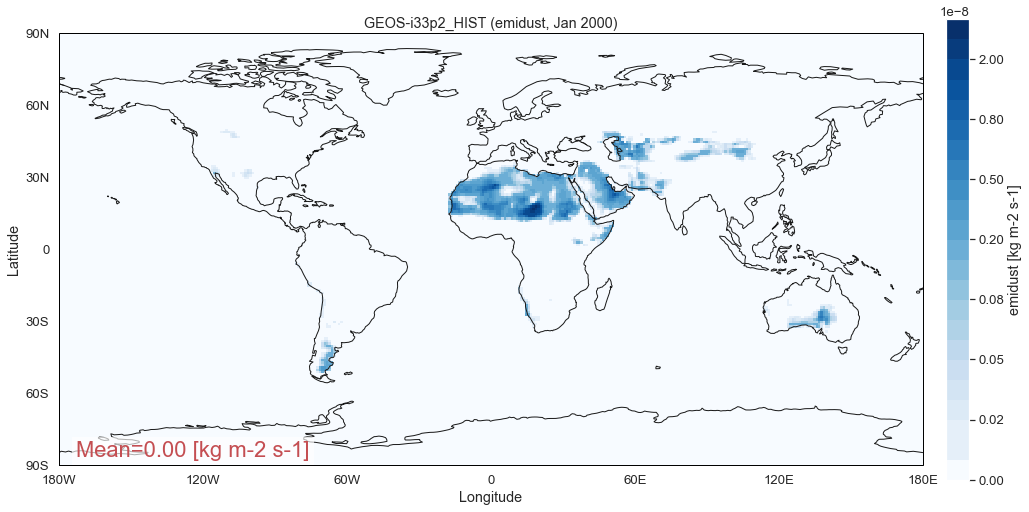

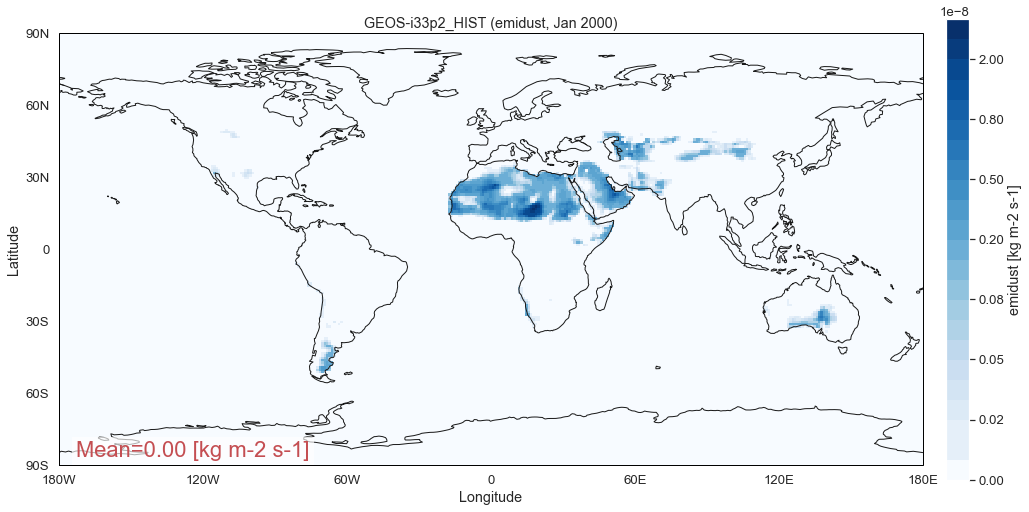

In [33]:
mod_data.quickplot_map()